In [11]:
import utils
import importlib
importlib.reload(utils)


import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from BSRN_arch import BSRN
import torch

In [2]:
def image2tensor(image_path):
    image = Image.open(image_path).convert('RGB')
    totensor = transforms.ToTensor()
    image_tensor = totensor(image)
    return image_tensor

image_path = r"D:\home\ReproductionCode\BSRN\monarch.png"
model_path = r"D:\home\ReproductionCode\BSRN\pretrained_models\net_g_BSRN_x4.pth"
image_lr = image2tensor(image_path)


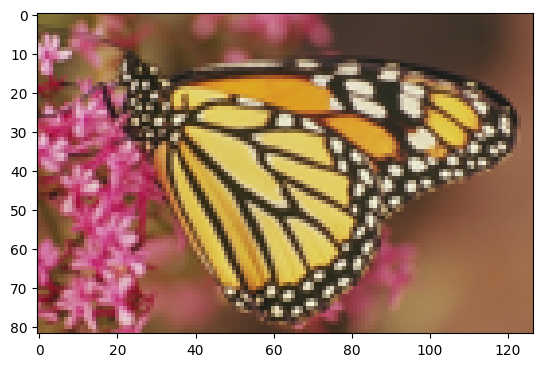

In [3]:
# helper function to show an image
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
        
    nping = img.numpy()
    if one_channel:
        plt.imshow(nping, cmap='Greys')
    else:
        plt.imshow(np.transpose(nping, (1, 2, 0)))
        
matplotlib_imshow(image_lr)
image_lr = image_lr.unsqueeze(0)

BSConvU
Saving layer 1 feature maps...
Saving layer 2 feature maps...
Saving layer 3 feature maps...
Saving layer 4 feature maps...
Saving layer 5 feature maps...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


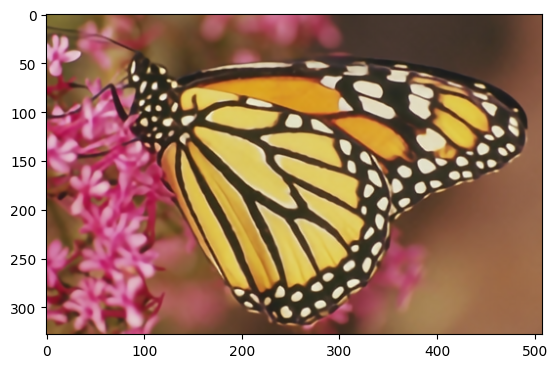

In [12]:
model = BSRN()
load_net = torch.load(model_path)
model.load_state_dict(load_net['params'], strict=True)
model = model.eval()

with torch.no_grad():
    image_sr = model(image_lr).squeeze(0)
    matplotlib_imshow(image_sr)